<a href="https://colab.research.google.com/github/lamyse1/GenAI/blob/main/Implementing_VAEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 2 Hands-on Lab: Implementing a Variational Auto-Encoder and Training it on the MNIST Dataset**




**Introduction**
This notebook will guide you in implementing a simple Variational Autoencoder (VAE) using Python and a deep learning framework like TensorFlow or PyTorch. You will learn how to train a VAE on a dataset, visualize its latent space, and generate new data from the learned latent representations.

Let's get started!

---

**Step 1: Import the Libraries**
First, we will import the needed libraries for the data handling, model creation, and visualization.

In [1]:
#Upgrade Tensorflow if needed
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import tensorflow.keras.optimizers
import numpy as np
import matplotlib.pyplot as plt


**Step 2: Load the Dataset**

You will use the [MNIST](https://www.tensorflow.org/datasets/catalog/mnist) dataset of handwritten digits as input data.



In [3]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Step 3: Build the VAE Model**

1. **Define the Encoder:** the encoder compresses the input into a latent representation.

In [4]:
input_dim = 28 * 28
latent_dim = 2

# Encoder
inputs = Input(shape=(input_dim,))
h = Dense(512, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])


2. **Define the Decoder:** the decoder reconstructs the data from latent representation.



In [5]:
# Decoder
decoder_h = Dense(512, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)


3. **Define the VAE Model:** Combine the encoder and decoder.

In [6]:
vae = Model(inputs, x_decoded_mean)

**Step 4: Define the loss Function**

We will use the MSE error and Adam optimizer.

In [7]:
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 5e-01, decay_steps = 2500, decay_rate = 0.75,staircase=True)
tensorflow.keras.optimizers.Adam(learning_rate = lr_schedule,beta_1=0.95,beta_2=0.99,epsilon=1e-01)
vae.compile(optimizer='adam', loss='mean_squared_error')

**Step 5: Train the VAE**

Train the model on the MNIST dataset.

In [8]:
vae.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0768 - val_loss: 0.0507
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0495 - val_loss: 0.0469
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0466 - val_loss: 0.0455
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0452 - val_loss: 0.0444
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0442 - val_loss: 0.0435
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0433 - val_loss: 0.0428
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0427 - val_loss: 0.0424
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0423 - val_loss: 0.0421
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 0.0417 - val_loss: 0.0416
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0414 - val_loss: 0.0415
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0409 - val_loss: 0.0412
Epoch 12/20
469/469 ━━━━━━━━━━━

**Step 6: Visualize the Latent Space**

Plot the latent space to observe how the VAE organizes the data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


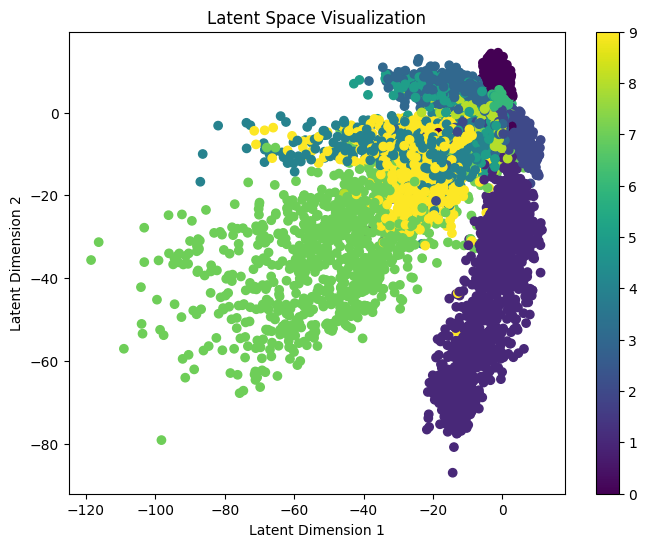

In [9]:
encoder = Model(inputs, z_mean)
z_test = encoder.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(z_test[:, 0], z_test[:, 1], c=_[:len(z_test)], cmap='viridis')
plt.colorbar()
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Latent Space Visualization")
plt.show()


**Step 7: Generate New Images**

Sample points from the latent space and generate new images.

[[-3. -3.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[-2.33333333 -3.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[-1.66666667 -3.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[-1. -3.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[-0.33333333 -3.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[ 0.33333333 -3.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[ 1. -3.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[ 1.66666667 -3.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[ 2.33333333 -3.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[ 3. -3.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[-3.         -2.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[-2.33333333 -2.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[-1.66666667 -2.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[-1.         -2.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[-0.33333333 -2.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[ 0.33333333 -2.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[ 1.   

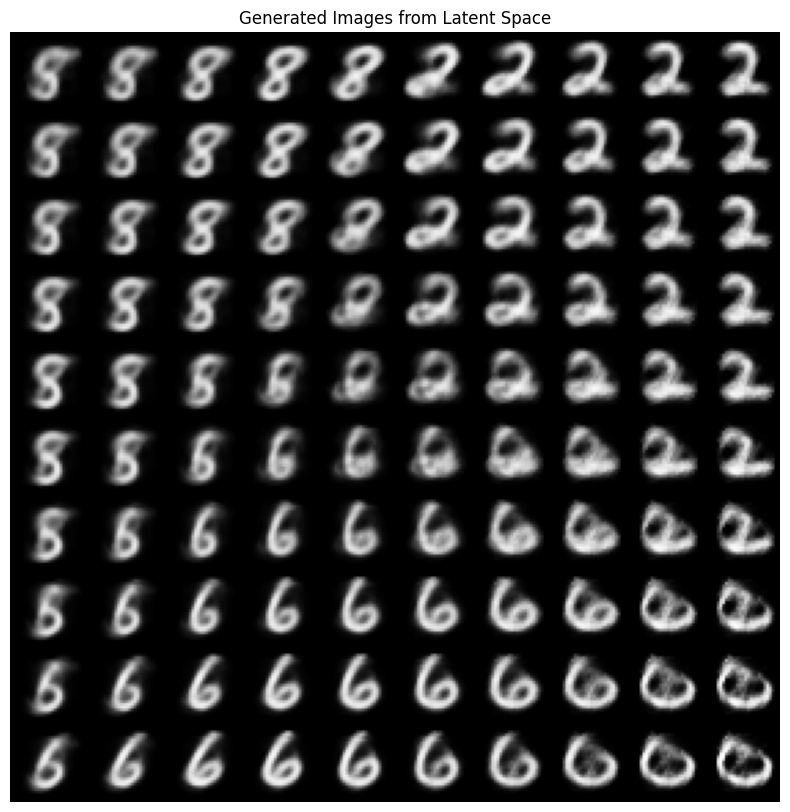

In [10]:
# Define a decoder model
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# Generate images
n = 10  # Number of images
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)

figure = np.zeros((28 * n, 28 * n))
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        print(z_sample)
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(28, 28)
        figure[i * 28: (i + 1) * 28, j * 28: (j + 1) * 28] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.title("Generated Images from Latent Space")
plt.axis('Off')
plt.show()





---

**Conclusion:**

Congratulations! You have successfully implemented and trained your first VAE! This activity gave you hands-on experience with VAEs, reinforcing theoretical concepts through practical implementation. Let me know if you'd like further refinements or additional challenges!

---